In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/ffiltered_data.csv'

df = pd.read_csv(file_path)


<ipython-input-1-ec8770186f58>:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


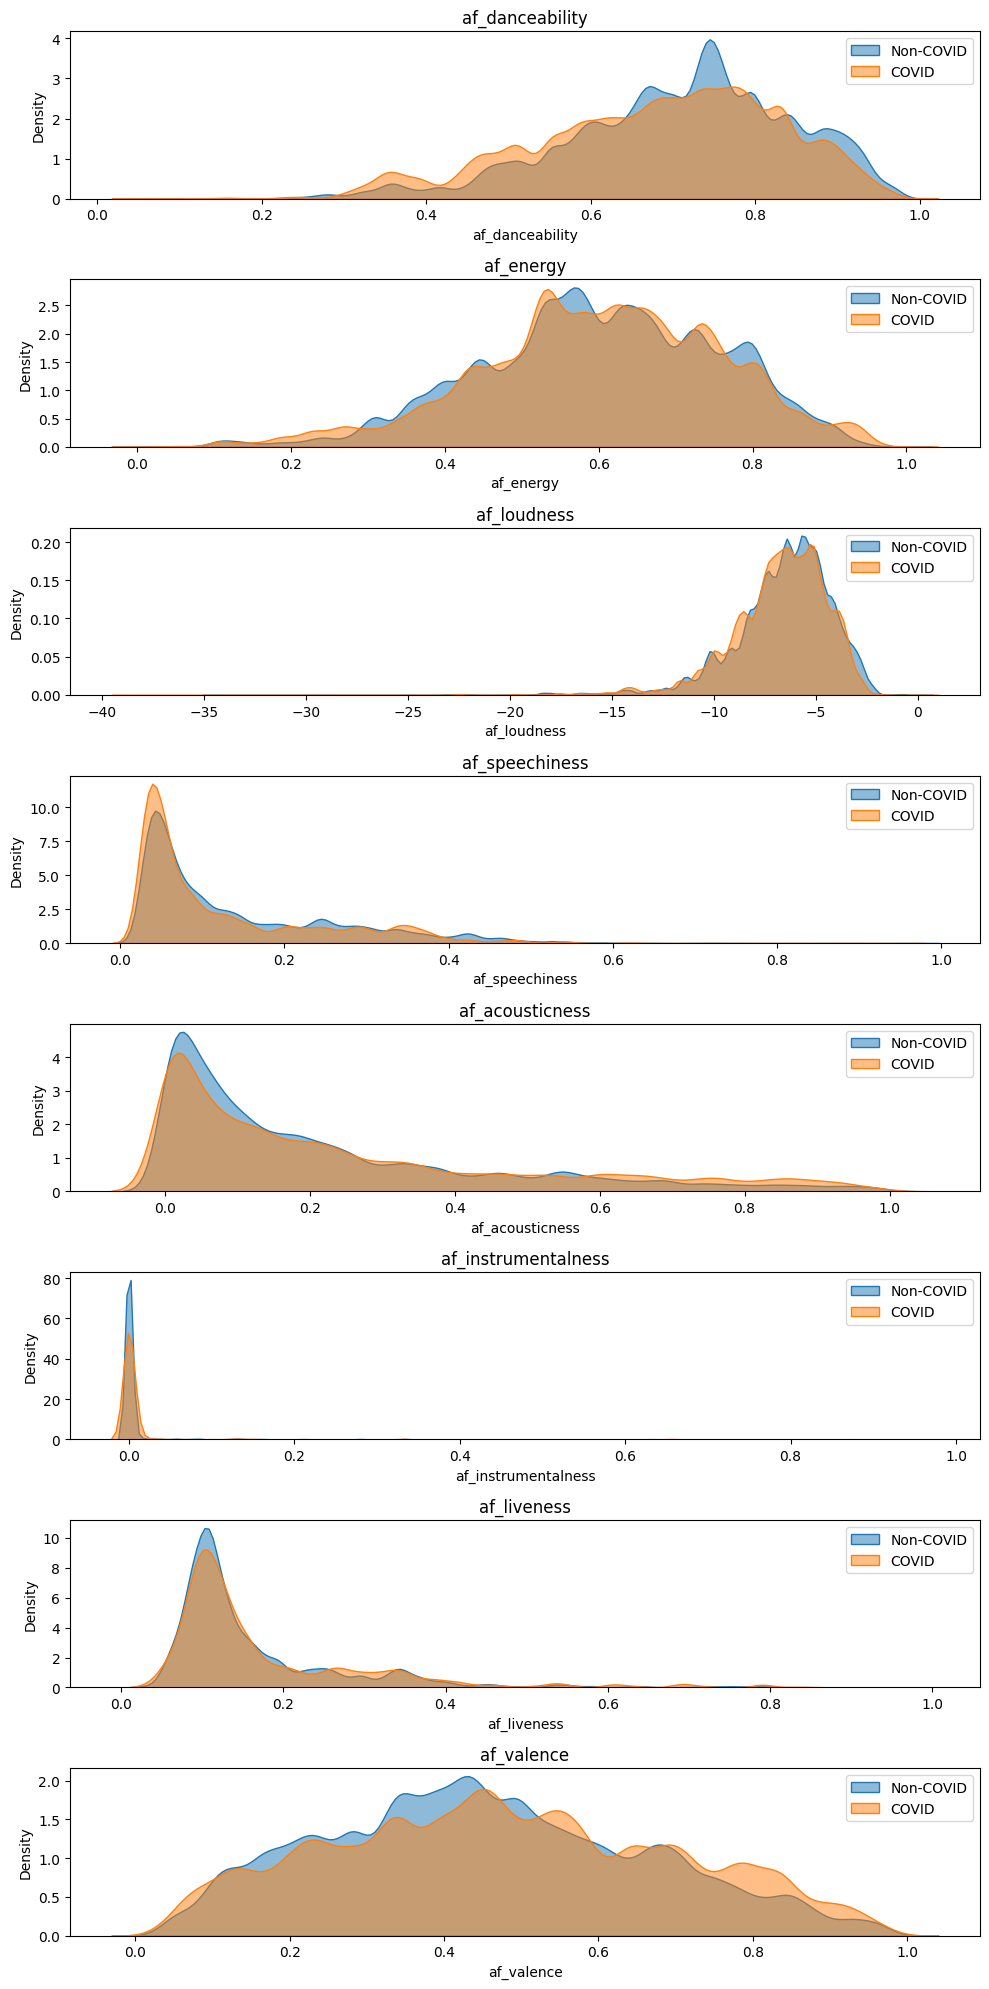

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `df` is your DataFrame
# df = pd.read_csv('your_data.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define the start date of COVID-19 period
covid_start_date = pd.to_datetime('2020-03-15')

# Split the DataFrame into COVID and non-COVID periods
df_covid = df[df['date'] >= covid_start_date]
df_non_covid = df[df['date'] < covid_start_date]

# List of attributes to plot
attributes = ['af_danceability', 'af_energy', 'af_loudness', 'af_speechiness',
              'af_acousticness', 'af_instrumentalness', 'af_liveness', 'af_valence']

# Plot settings
alpha = 0.5

# Create a figure with subplots
fig, axs = plt.subplots(len(attributes), figsize=(10, 20))

# Generate density plot for each attribute
for i, attribute in enumerate(attributes):
    sns.kdeplot(df_non_covid[attribute], ax=axs[i], fill=True, common_norm=False, alpha=alpha, label='Non-COVID')
    sns.kdeplot(df_covid[attribute], ax=axs[i], fill=True, common_norm=False, alpha=alpha, label='COVID')
    axs[i].set_title(attribute)
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



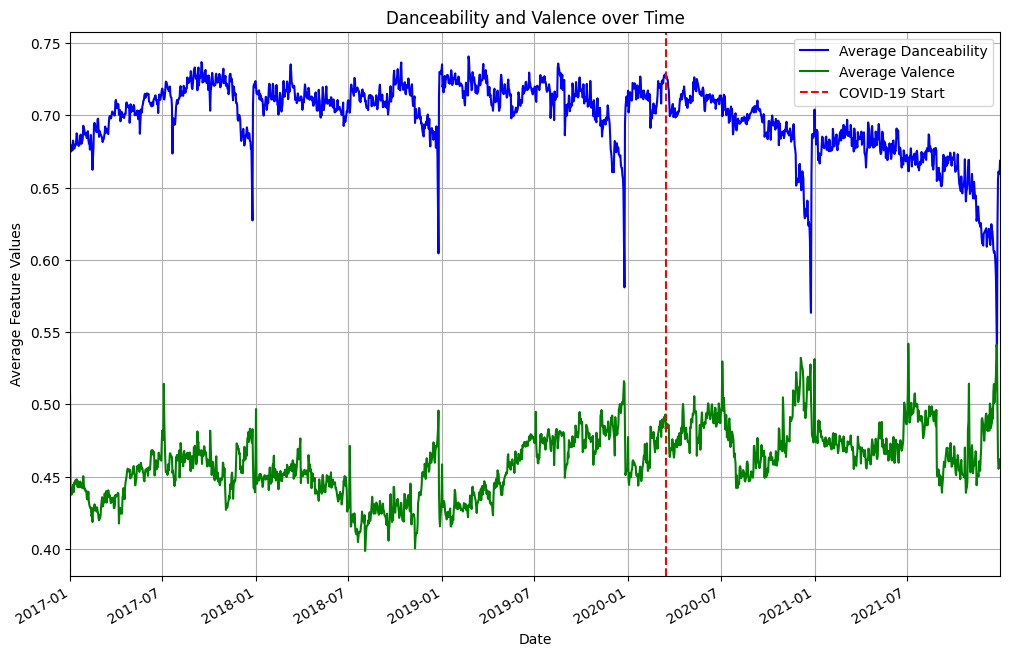

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming `df` is your DataFrame
# df = pd.read_csv('your_data.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate the daily average for each feature
daily_avg_danceability = df.groupby('date')['af_danceability'].mean()
daily_avg_valence = df.groupby('date')['af_valence'].mean()
daily_avg_acousticness = df.groupby('date')['af_acousticness'].mean()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(daily_avg_danceability.index, daily_avg_danceability, label='Average Danceability', color='blue')
plt.plot(daily_avg_valence.index, daily_avg_valence, label='Average Valence', color='green')
# Define the date format for the x-axis
date_format = mdates.DateFormatter('%Y-%m')

# Set the locator for each 6 months
locator = mdates.MonthLocator(interval=6)

# Set the major locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_format)

# Set the limits for the x-axis to ensure the first tick is the start date
ax.set_xlim([df['date'].min(), df['date'].max()])

# Draw a vertical line for the COVID-19 start date
covid_start_date = pd.to_datetime('2020-03-15')
plt.axvline(x=covid_start_date, color='red', linestyle='--', label='COVID-19 Start')

plt.title('Danceability and Valence over Time')
plt.xlabel('Date')
plt.ylabel('Average Feature Values')
plt.legend()
plt.grid(True)

# Rotate date labels for clarity
plt.gcf().autofmt_xdate()

plt.show()



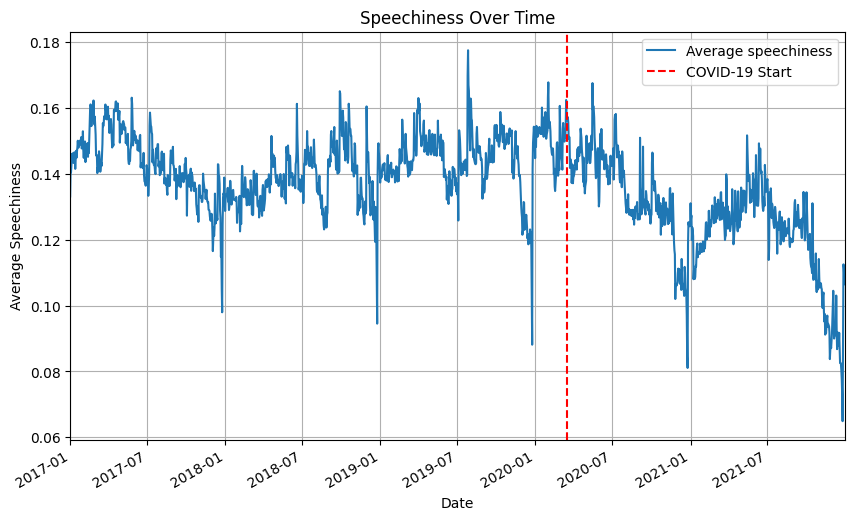

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming `df` is your DataFrame
# df = pd.read_csv('your_data.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate the daily average 'af_danceability'
daily_avg_speechiness = df.groupby('date')['af_speechiness'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_speechiness.index, daily_avg_speechiness, label='Average speechiness')

# Define the date format for the x-axis
date_format = mdates.DateFormatter('%Y-%m')

# Set the locator for each 6 months
locator = mdates.MonthLocator(interval=6)

# Set the major locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_format)

# Set the limits for the x-axis to ensure the first tick is the start date
ax.set_xlim([df['date'].min(), df['date'].max()])

# Draw a vertical line for the COVID-19 start date
covid_start_date = pd.to_datetime('2020-03-15')
plt.axvline(x=covid_start_date, color='r', linestyle='--', label='COVID-19 Start')

plt.title('Speechiness Over Time')
plt.xlabel('Date')
plt.ylabel('Average Speechiness')
plt.legend()
plt.grid(True)

# Rotate date labels for clarity
plt.gcf().autofmt_xdate()

plt.show()


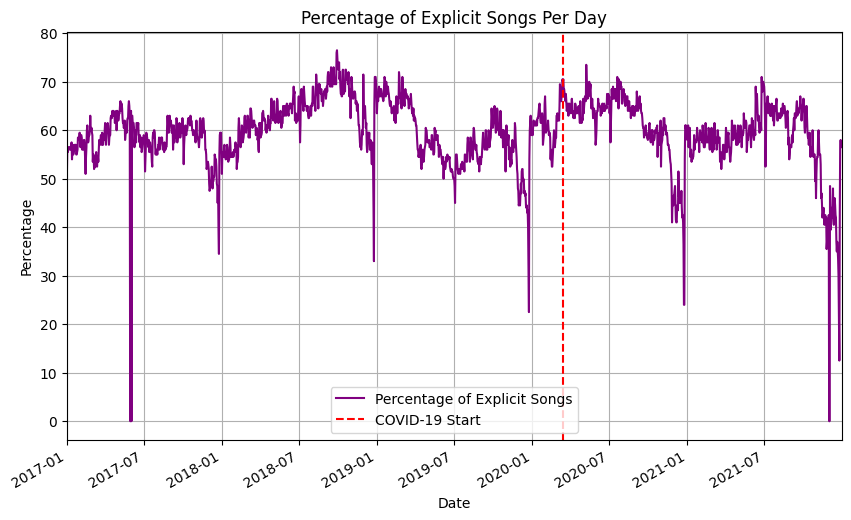

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming `df` is your DataFrame
# df = pd.read_csv('your_data.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Ensure that NaN values are treated as False or handle them appropriately
df['explicit'] = df['explicit'].fillna(False)

# Calculate the number of explicit songs per day
explicit_count = df[df['explicit']].groupby('date').size()

# Ensure every day is represented even if no explicit songs were counted that day
# This creates a full date range from min to max date, and reindexes the explicit_count with it
full_date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())
explicit_count = explicit_count.reindex(full_date_range, fill_value=0)

# Assuming each day should have 200 songs, this series will fill missing dates with 200
total_songs = pd.Series(200, index=full_date_range)

# Calculate the percentage of explicit songs
daily_explicit_percentage = (explicit_count / total_songs) * 100

# Plotting
plt.figure(figsize=(10, 6))

# Plot the percentage of explicit songs per day
plt.plot(daily_explicit_percentage.index, daily_explicit_percentage, label='Percentage of Explicit Songs', color='purple')

# Define the date format for the x-axis
date_format = mdates.DateFormatter('%Y-%m')

# Set the locator for each 6 months
locator = mdates.MonthLocator(interval=6)

# Set the major locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_format)

# Set the limits for the x-axis to ensure the first tick is the start date
ax.set_xlim([df['date'].min(), df['date'].max()])

# Draw a vertical line for the COVID-19 start date
covid_start_date = pd.to_datetime('2020-03-15')
plt.axvline(x=covid_start_date, color='red', linestyle='--', label='COVID-19 Start')

plt.title('Percentage of Explicit Songs Per Day')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Rotate date labels for clarity
plt.gcf().autofmt_xdate()

plt.show()

